# L5: Prompt Caching

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
from anthropic import Anthropic

In [2]:
# Load environment variables
from helper import load_env
load_env()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [3]:
client = Anthropic()
MODEL_NAME="claude-3-5-sonnet-20241022"

### Loading The Book

In [4]:
with open('files/frankenstein.txt', 'r') as file:
    book_content = file.read()

In [5]:
len(book_content)

438804

In [6]:
book_content[1000:2000]

'by Mary Wollstonecraft (Godwin) Shelley\n\n\n CONTENTS\n\n Letter 1\n Letter 2\n Letter 3\n Letter 4\n Chapter 1\n Chapter 2\n Chapter 3\n Chapter 4\n Chapter 5\n Chapter 6\n Chapter 7\n Chapter 8\n Chapter 9\n Chapter 10\n Chapter 11\n Chapter 12\n Chapter 13\n Chapter 14\n Chapter 15\n Chapter 16\n Chapter 17\n Chapter 18\n Chapter 19\n Chapter 20\n Chapter 21\n Chapter 22\n Chapter 23\n Chapter 24\n\n\n\n\nLetter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\nI am already far north of London, and as I walk in the streets of\nPetersburgh, I feel a cold northern breeze play upon my cheeks, which\nbraces my nerves and fills me with delight. Do you understand this\n

## Uncached Request

In [7]:
import time
def make_non_cached_api_call():
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "<book>" + book_content + "</book>"
                },
                {
                    "type": "text",
                    "text": "What happens in chapter 3?"
                }
            ]
        }
    ]

    start_time = time.time()
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=500,
        messages=messages,
    )
    end_time = time.time()

    return response, end_time - start_time

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Time:</b> The time used to return the output can be different from video. Don't be surprised if your results differ from those shown in the video.</p>

In [8]:
non_cached_response, non_cached_time = make_non_cached_api_call()
print(f"Non-cached time: {non_cached_time:.2f} seconds")

print("\nOutput (non-cached):")
print(non_cached_response.content)

Non-cached time: 32.96 seconds

Output (non-cached):
[TextBlock(text="In Chapter 3 of Frankenstein, several key events occur:\n\n1. Victor Frankenstein begins his studies at the University of Ingolstadt at age 17.\n\n2. He meets two professors:\n- Professor M. Krempe (natural philosophy), who harshly criticizes Victor's interest in alchemists like Cornelius Agrippa\n- Professor M. Waldman, who is more understanding and introduces Victor to modern chemistry and science in an inspiring way\n\n3. Victor becomes captivated by Professor Waldman's lecture about how modern scientists have achieved real power over nature, unlike the empty promises of ancient alchemists.\n\n4. Professor Waldman takes Victor under his wing, shows him his laboratory, and provides him with a list of books to study.\n\n5. Victor throws himself completely into his scientific studies, particularly chemistry. He makes rapid progress and even develops improvements to some chemical instruments, earning praise from his p

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [9]:
non_cached_response.usage

Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=108438, output_tokens=309)

## Cached Version

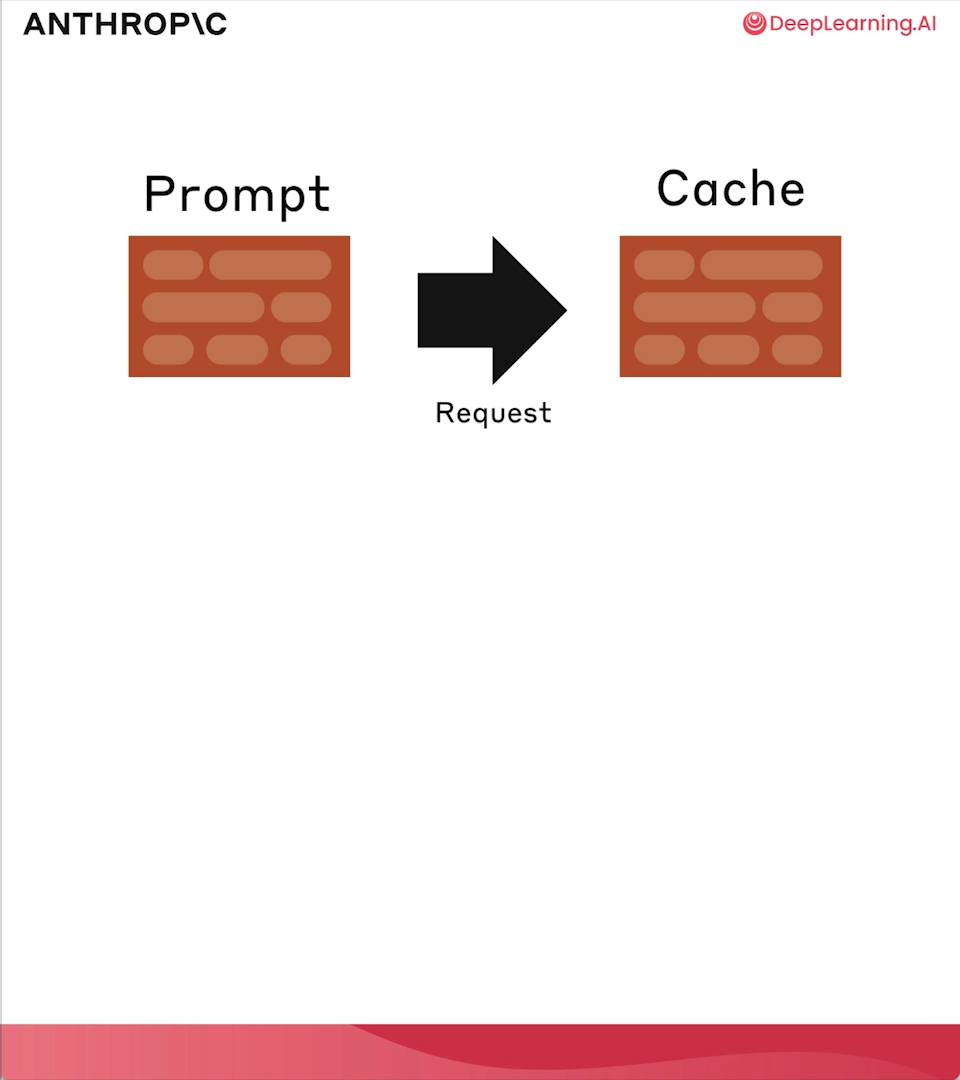



Not needed to cache everything but we can choose to do so. Once we cache the prompt the following conversation can load from cache.

In [10]:
def make_cached_api_call():
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "<book>" + book_content + "</book>",
                    "cache_control": {"type": "ephemeral"}
                },
                {
                    "type": "text",
                    "text": "What happens in chapter 5?"
                }
            ]
        }
    ]

    start_time = time.time()
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=500,
        messages=messages,
    )
    end_time = time.time()

    return response, end_time - start_time

In [11]:
response1, duration1 = make_cached_api_call()

In [14]:
duration1

19.191856622695923

In [12]:
response1

Message(id='msg_01EBVkY6TgKLjqCLyMAJS6Fc', content=[TextBlock(text='In Chapter 5, Victor Frankenstein finally succeeds in bringing his creation to life on a dreary night in November. However, upon seeing the creature animate, he is horrified by its appearance - its yellow skin, black lips, watery eyes, and overall hideous form. Despite having selected what he thought were beautiful features, the end result is monstrrous.\n\nOvercome with horror and disgust, Frankenstein flees from his laboratory and tries to sleep, but is tormented by nightmares. He dreams of Elizabeth, but when he kisses her in the dream, she transforms into the corpse of his dead mother.\n\nThe creature finds Frankenstein in his bedroom and tries to reach out to him, but Frankenstein runs away in terror. He ends up having a nervous breakdown and falls into a fever that lasts several months. His friend Henry Clerval arrives to take care of him during his illness.\n\nThis chapter marks the crucial moment when Frankenst

In [13]:
response2, duration2 = make_cached_api_call()

In [15]:
response2.usage

Usage(cache_creation_input_tokens=0, cache_read_input_tokens=108427, input_tokens=11, output_tokens=351)

In [16]:
duration2

10.74490237236023

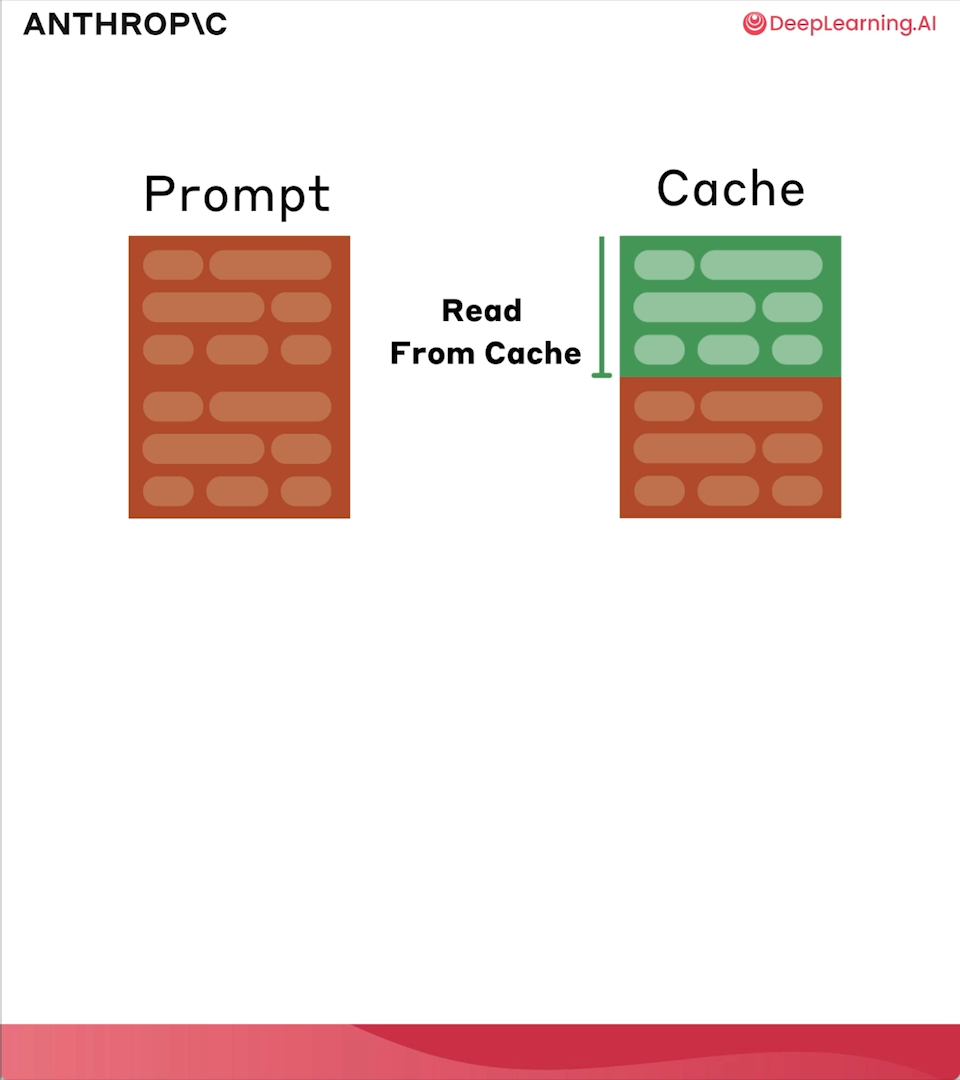

## Prompt Caching Pricing

* Cache write tokens are 25% more expensive than base input tokens
* Cache read tokens are 90% cheaper than base input tokens
* Regular input and output tokens are priced at standard rates

**Each cache has a Time to Live (TTL) of 5 minutes.**

## Multi-Turn Caching

In [17]:
messages=[
    # ...long conversation so far
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Hello, can you tell me more about the solar system",
                "cache_control": {"type": "ephemeral"}
            }
        ]
    },
    {
        "role": "assistant",
        "content": "Certainly! The solar system is the collection of celestial bodies that orbit our Sun. It consists of eight planets, numerous moons, asteroids, comets, and other objects. The planets, in order from closest to farthest from the Sun, are: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. Each planet has its own unique characteristics and features. Is there a specific aspect of the solar system you'd like to know more about?"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Tell me more about Mars.",
                "cache_control": {"type": "ephemeral"}
            }
        ]
    }
]

In [18]:
messages=[
    # ...long conversation so far
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Hello, can you tell me more about the solar system",
            }
        ]
    },
    {
        "role": "assistant",
        "content": "Certainly! The solar system is the collection of celestial bodies that orbit our Sun. It consists of eight planets, numerous moons, asteroids, comets, and other objects. The planets, in order from closest to farthest from the Sun, are: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. Each planet has its own unique characteristics and features. Is there a specific aspect of the solar system you'd like to know more about?"
    },
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Tell me more about Mars.",
                "cache_control": {"type": "ephemeral"}
            }
        ]
    },
    {
        "role": "assistant",
        "content": "I'd love to tell you about Mars.  Mars is...."
    },
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "That's really neat.  Tell me about Pluto!",
                "cache_control": {"type": "ephemeral"}
            }
        ]
    },
]

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Computer Use Code:</b> The computer use code shown at the end of the video is not part of this lab. This code will also be reviewed step by step in the next lessons, and finally, you will see it in detail in the "Computer Use" lesson.</p>